In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/TMD.csv')

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,MediumPain,LowStiffness,PainlessJaw,DifficultToChew,SeverePain,NowAndThen,PainfulMouth,Severe,Weak,Cramps,MediumTMD
1,MediumPain,SevereStiffness,PainlessJaw,AbleToChew,SeverePain,NowAndThen,PainlessMouth,NowAndThen,Weak,Cramps,LowTMD
2,HighPain,NoStiffness,PainlessJaw,DifficultToChew,LowPain,NoAche,PainlessMouth,NowAndThen,UnableToWalk,LowPainCramps,LowTMD
3,MediumPain,NoStiffness,PainlessJaw,UnableToChew,LowPain,NoAche,PainlessMouth,Severe,UnableToWalk,LowPainCramps,LowTMD
4,HighPain,SevereStiffness,PainfulJaw,DifficultToChew,SeverePain,Chronic,PainfulMouth,NowAndThen,Weak,Cramps,SevereTMD


In [ ]:
df["FacialPain"] = df["FacialPain"].map({'LowPain':1 ,'MediumPain':2,'HighPain':3})
df["JawStiffness"] = df["JawStiffness"].map({'NoStiffness':1 ,'LowStiffness':2,'SevereStiffness':3})
df["JawPain"] = df["JawPain"].map({'PainlessJaw':1 ,'PainfulJaw':2})
df["ChewingDifficulty"] = df["ChewingDifficulty"].map({'AbleToChew':1 ,'DifficultToChew':2,'UnableToChew':3})
df["EarPain"] = df["EarPain"].map({'NoPain':1 ,'LowPain':2,'SeverePain':3})
df["Headache"] = df["Headache"].map({'NoAche':1 ,'NowAndThen':2,'Chronic':3})
df["MouthPain"] = df["MouthPain"].map({'PainlessMouth':1 ,'PainfulMouth':2})
df["JointLocking"] = df["JointLocking"].map({'LowToNo':1 ,'NowAndThen':2,'Severe':3})
df["Dizziness"] = df["Dizziness"].map({'Weak':1 ,'UnableToWalk':2,'UnableToStand':3})
df["MuscleSpasms"] = df["MuscleSpasms"].map({'Cramps':1 ,'LowPainCramps':2,'HighPainCramps':3})
df["Severity"] = df["Severity"].map({'LowTMD':0 ,'MediumTMD':1,'SevereTMD':2})

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,2,2,1,2,3,2,2,3,1,1,1
1,2,3,1,1,3,2,1,2,1,1,0
2,3,1,1,2,2,1,1,2,2,2,0
3,2,1,1,3,2,1,1,3,2,2,0
4,3,3,2,2,3,3,2,2,1,1,2


In [ ]:
# Cleaning empty cells
empty_df = df.dropna()
print(empty_df.to_string())

      FacialPain  JawStiffness  JawPain  ChewingDifficulty  EarPain  Headache  MouthPain  JointLocking  Dizziness  MuscleSpasms  Severity
0              2             2        1                  2        3         2          2             3          1             1         1
1              2             3        1                  1        3         2          1             2          1             1         0
2              3             1        1                  2        2         1          1             2          2             2         0
3              2             1        1                  3        2         1          1             3          2             2         0
4              3             3        2                  2        3         3          2             2          1             1         2
5              2             2        1                  1        3         2          2             3          3             1         1
6              3             1    

In [ ]:
#Removing Duplicates
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3634    False
3635    False
3636    False
3637    False
3638    False
Length: 3639, dtype: bool


In [ ]:
#Saving the variables to a List
columns = list(df.columns)
columns

['FacialPain',
 'JawStiffness',
 'JawPain',
 'ChewingDifficulty',
 'EarPain',
 'Headache',
 'MouthPain',
 'JointLocking',
 'Dizziness',
 'MuscleSpasms',
 'Severity']

In [ ]:
#Looking at the proportion of missing data

print(df.isnull().mean())
print("")

FacialPain           0.0
JawStiffness         0.0
JawPain              0.0
ChewingDifficulty    0.0
EarPain              0.0
Headache             0.0
MouthPain            0.0
JointLocking         0.0
Dizziness            0.0
MuscleSpasms         0.0
Severity             0.0
dtype: float64



In [ ]:
#Checking the Datatype of each column
print(df.dtypes)

FacialPain           int64
JawStiffness         int64
JawPain              int64
ChewingDifficulty    int64
EarPain              int64
Headache             int64
MouthPain            int64
JointLocking         int64
Dizziness            int64
MuscleSpasms         int64
Severity             int64
dtype: object


In [ ]:
x= df.iloc[:,0:13].values
y= df['Severity'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

**KNN**

Minimum error:- 0.0032967032967032967 at K = 29


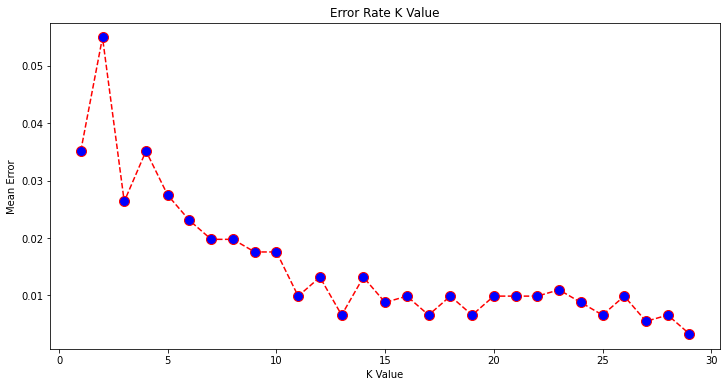

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[395,   4,   0],
       [ 10, 252,   1],
       [  0,   3, 245]])

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)*100

In [ ]:
print("Accuracy of KNN model is: " + str(round(knn_accuracy, 2)) + '%')

Accuracy of KNN model is: 98.02%


**MULTILAYER PERCEPTRON**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

In [ ]:
mlp_accuracy = accuracy_score(y_test, predictions)*100
print ("The accuracy score of MLP Classifier is: " + str(mlp_accuracy) + '%')

The accuracy score of MLP Classifier is: 100.0%


In [ ]:
model_compare = pd.DataFrame({"KNN":knn_accuracy,
                              "MLP":mlp_accuracy,}, index = ["accuracy"])
model_compare

,KNN,MLP
accuracy,98.021978,100.0
